# Data Cleaning and EDA:
**Website Used:** MagicBricks\
url = [ https://www.magicbricks.com/property-for-rent/residential-real-estate?bedroom=1,2,3,4&proptype=Multistorey-Apartment,Builder-Floor-Apartment,Penthouse,Studio-Apartment,Service-Apartment,Residential-House,Villa&cityName=Hyderabad ]
## Problem Statement:
- Analyse the rental property characteristics and market dynamics in Hyderabad to identify key factors that effect the rent and occupancy patterns.


In [1]:
# importing all required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## **Step 1 - Load the Data**

In [2]:
# loading the data set
df = pd.read_csv("Rental_data.csv")
df.head()

,Unnamed: 0,Type,Bedrooms,Location,Name_of_the_Society,Furnishing_Status,Bathrooms,Tenant_Prefered,Availability,Area_in_sqft,Floor,Maintenance_charges,Rent
0,0,Flat,4,"Kokapet, Outer Ring Road",Sonthalia Fortune Sky Villas,Furnished,5.0,Family,Immediately,7333.0,8.0,29000.0,₹3.5 Lac
1,1,Flat,1,Kondapur,Kondapur,Furnished,1.0,Bachelors/Family,Immediately,450.0,4.0,1000.0,"₹25,000"
2,2,Flat,1,Kondapur,Kondapur,Furnished,1.0,Bachelors/Family,From Jun '25,700.0,5.0,1500.0,"₹26,500"
3,3,Flat,3,Kondapur,GHR Titania,Semi-Furnished,3.0,Bachelors,Immediately,1788.0,5.0,NaN,"₹55,000"
4,4,Flat,3,"Kokapet, Outer Ring Road",Prestige Tranquil,Semi-Furnished,3.0,Family,Immediately,1166.0,3.0,4.0,"₹65,000"


#### Data Overview

In [3]:
print("Number of features (columns):", df.shape[1])
print("Number of observations (rows):", df.shape[0])
print("\nData types:\n", df.dtypes)
print("\nMissing values:\n", df.isnull().sum())

Number of features (columns): 13
Number of observations (rows): 690

Data types:
 Unnamed: 0               int64
Type                    object
Bedrooms                 int64
Location                object
Name_of_the_Society     object
Furnishing_Status       object
Bathrooms              float64
Tenant_Prefered         object
Availability            object
Area_in_sqft           float64
Floor                  float64
Maintenance_charges    float64
Rent                    object
dtype: object

Missing values:
 Unnamed: 0               0
Type                    34
Bedrooms                 0
Location                 0
Name_of_the_Society    325
Furnishing_Status        3
Bathrooms                1
Tenant_Prefered          1
Availability             2
Area_in_sqft             7
Floor                  204
Maintenance_charges    417
Rent                     0
dtype: int64


In [4]:
# looking for any irregularities in data
for i in df:
    print("*"*20, i, "*"*20)
    print(df[i].unique())
    print()

******************** Unnamed: 0 ********************
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 23

## **Step 2 - Cleaning the Data**

In [5]:
# deleting the Unnamed: 0 column
del df["Unnamed: 0"]

#### Cleaning the Rent Column:
- Removing the symbols "₹" and "," if any.
- Removing the string "Lac" from the values and multiply with 100000 so that the value coverts into lakhs.
- Converting the column into float type

In [6]:
# Function to clean rent values
def clean_rent(val):
    if pd.isnull(val):
        return np.nan
    val = str(val)
    # Remove unwanted characters
    for symbol in ["₹", ","]:
        val = val.replace(symbol, "")
    val = val.strip()
    # Handle 'Lac'
    if "Lac" in val:
        val = val.replace("Lac", "").strip()
        try:
            return float(val) * 100000
        except:
            return np.nan
    # Handle empty strings
    if val == "":
        return np.nan
    try:
        # Converting the Rent into float type
        return float(val)
    except:
        # If rent cannot be converted into float, it is replaced with null value
        return np.nan

# Apply the cleaning function
df["Rent"] = df["Rent"].apply(clean_rent)

In [7]:
print(df["Rent"].head())
print(df["Rent"].dtype)
print("Number of null values =",df["Rent"].isna().sum())

0    350000.0
1     25000.0
2     26500.0
3     55000.0
4     65000.0
Name: Rent, dtype: float64
float64
Number of null values = 0


- Replacing "Flat" with "Apartment" in Type column as both are the same.

In [8]:
df["Type"] = df["Type"].replace({"Flat" : "Apartment"})

#### Converting Data types:
Converting Numerical Columns into float/int.

In [9]:
num_cols = ["Bedrooms", "Bathrooms", "Area_in_sqft", "Floor", "Maintenance_charges", "Rent"]
for col in num_cols:
    df[col] = pd.to_numeric(df[col], errors="coerce")

In [10]:
df.dtypes

Type                    object
Bedrooms                 int64
Location                object
Name_of_the_Society     object
Furnishing_Status       object
Bathrooms              float64
Tenant_Prefered         object
Availability            object
Area_in_sqft           float64
Floor                  float64
Maintenance_charges    float64
Rent                   float64
dtype: object

#### Handling Missing Values:


In [11]:
df.isna().sum()

Type                    34
Bedrooms                 0
Location                 0
Name_of_the_Society    325
Furnishing_Status        3
Bathrooms                1
Tenant_Prefered          1
Availability             2
Area_in_sqft             7
Floor                  204
Maintenance_charges    417
Rent                     0
dtype: int64

In [12]:
# Impute categorical columns with mode
for col in ["Type","Furnishing_Status", "Tenant_Prefered", "Availability"]:
    mode_val = df[col].mode()[0]
    df[col] = df[col].fillna(mode_val)

- Filling any missing values in the "Bathrooms" column with the median value of "Bathrooms" based on number of bedrooms. If the median is not available (i.e., if it is NaN), it fills those missing values with 0.

In [13]:
df["Bathrooms"] = df.groupby("Bedrooms")["Bathrooms"].transform(lambda x: x.fillna(x.median() if not pd.isna(x.median()) else 0))

- Filling any missing values in the "Area_in_sqft" column with the median value of "Area_in_sqft" based on number of Bedrooms. If the median is not available (i.e., if it is NaN), it fills those missing values with 0.

In [14]:
df["Area_in_sqft"] = df.groupby("Bedrooms")["Area_in_sqft"].transform(lambda x: x.fillna(x.median() if not pd.isna(x.median()) else 0))

- Filling any missing values in the "Floor" column with the median value of "Floor" for each "Type". If the median is not available (i.e., if it is NaN), it fills those missing values with 0.

In [15]:
df["Floor"] = df.groupby("Type")["Floor"].transform(lambda x: x.fillna(x.median() if not pd.isna(x.median()) else 0))

- Maintenance charges are missing in many rows, if we try to impute it with median that might not be the correct median and create a bias, so imputing it with 0.(Assuming most of them do not charge maintenance or it is included in the rent).

In [16]:
df["Maintenance_charges"] = df["Maintenance_charges"].fillna(0)

- Imputing the missing values in "Name_of_the_Society" column with "Unknown" to avoid incorrect grouping.

In [17]:
df["Name_of_the_Society"] = df["Name_of_the_Society"].fillna("Unknown")

In [18]:
df.isna().sum()

Type                   0
Bedrooms               0
Location               0
Name_of_the_Society    0
Furnishing_Status      0
Bathrooms              0
Tenant_Prefered        0
Availability           0
Area_in_sqft           0
Floor                  0
Maintenance_charges    0
Rent                   0
dtype: int64

- There are no null values in the DataFrame.

#### Checking for duplicate rows

In [19]:
duplicates = df.duplicated(keep="first")       # Except the first occurance all the other occurances are considered as duplicates
num_duplicates = duplicates.sum()
print(f"Number of duplicate rows: {num_duplicates}")

Number of duplicate rows: 0


In [20]:
df = df.drop_duplicates()

### Feature Engineering:
- Adding a new feature **Total_Monthly_Charges** which is the sum of rent and maintenance charges, so that we can get more accurate picture of the total cost on tenant.

In [21]:
df["Total_Monthly_Charges"] = df["Rent"]+df["Maintenance_charges"]
df["Rent_per_sqft"] = df["Rent"]/df["Area_in_sqft"]

#### Finding the Premium Locations that are Expensive

In [22]:
High_Rents = df.sort_values(by="Total_Monthly_Charges",ascending=False).head(10)

In [23]:
High_Rents[["Location","Total_Monthly_Charges"]]

,Location,Total_Monthly_Charges
96,"Nandagiri Hills, Jubilee Hills",612000.0
0,"Kokapet, Outer Ring Road",379000.0
88,"Banjara Hills, NH 9",333000.0
313,Hitech City,320000.0
651,Divine Apartment,315000.0
141,MLA Colony Banjara Hills,286000.0
260,Hitech City,285000.0
115,Hitech City,280000.0
135,chitrapuri manikonda,280000.0
306,Hitech City,270000.0


- As we can see from the above table, the Premium locations like Hitech City, Banjara Hills, Kokapet, Manikonda etc. have very high rents.

#### Finding the locations having less rents

In [24]:
least_rents = df.sort_values(by="Total_Monthly_Charges",ascending=False).tail(10)

In [25]:
least_rents[["Location","Total_Monthly_Charges"]]

,Location,Total_Monthly_Charges
52,Rampally,7200.0
540,"Hayat Nagar, Rajendra Nagar, Outer Ring Road",7000.0
536,ramaneeya enclaves,6500.0
69,Old Bowenpally,6000.0
641,"Kranthi Colony, Peerzadiguda",6000.0
541,"Boduppal, NH 2 2",5500.0
513,Attapur,5000.0
588,Gajularamaram,5000.0
228,Narayanguda,5000.0
510,Badangpet,3500.0


- For lower rents, we have to prefer 1 BHK in locations that are either in the outskirts of the city or in the old city.

#### Identify and Removing Outliers in "Total_Monthly_Charges" column:
- Removing Outliers so that we can find more insights without any bias.

In [26]:
Q1 = df["Total_Monthly_Charges"].quantile(0.25)
Q3 = df["Total_Monthly_Charges"].quantile(0.75)
IQR = Q3 - Q1
lower_fence = Q1 - 1.5*IQR
upper_fence = Q3 + 1.5*IQR

# Identifying the outliers
Outlier_data = df[(df["Total_Monthly_Charges"] < lower_fence) | (df["Total_Monthly_Charges"] > upper_fence)]

#Removing the outliers
df = df[(df["Total_Monthly_Charges"] >= lower_fence) & (df["Total_Monthly_Charges"] <= upper_fence)]

## **Step 3 - UniVariate Analysis**:
### **Numerical/Continuous Variables:**
### Non Visual Univariate Analysis for Numerical Variables:

In [27]:
numerical_cols = ["Maintenance_charges","Rent","Total_Monthly_Charges","Rent_per_sqft"]
for i in numerical_cols:
    print(df[i].describe())
    print("\n","*"*20,"\n")

count      638.000000
mean      1679.609718
std       3995.292610
min          0.000000
25%          0.000000
50%          0.000000
75%       2000.000000
max      60000.000000
Name: Maintenance_charges, dtype: float64

 ******************** 

count       638.000000
mean      40992.789969
std       24346.629062
min        3500.000000
25%       23000.000000
50%       35000.000000
75%       55000.000000
max      120000.000000
Name: Rent, dtype: float64

 ******************** 

count       638.000000
mean      42672.399687
std       25885.252661
min        3500.000000
25%       24000.000000
50%       35900.000000
75%       59875.000000
max      126500.000000
Name: Total_Monthly_Charges, dtype: float64

 ******************** 

count    638.000000
mean      25.959095
std       15.245750
min        5.185185
25%       16.704545
50%       23.132748
75%       31.857356
max      212.500000
Name: Rent_per_sqft, dtype: float64

 ******************** 



#### Visual Univariate Analysis for Numerical Variables:

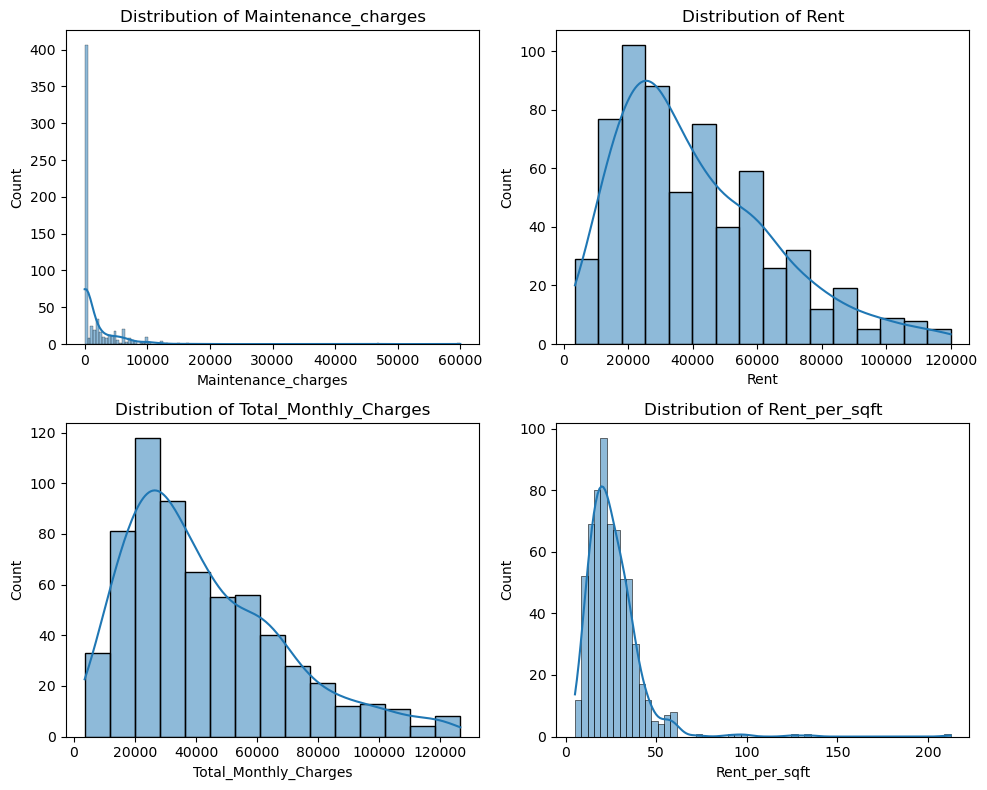

In [28]:
plt.figure(figsize=(10,8))
for i,col in enumerate(numerical_cols,1):
    plt.subplot(2,2,i)
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
plt.tight_layout()

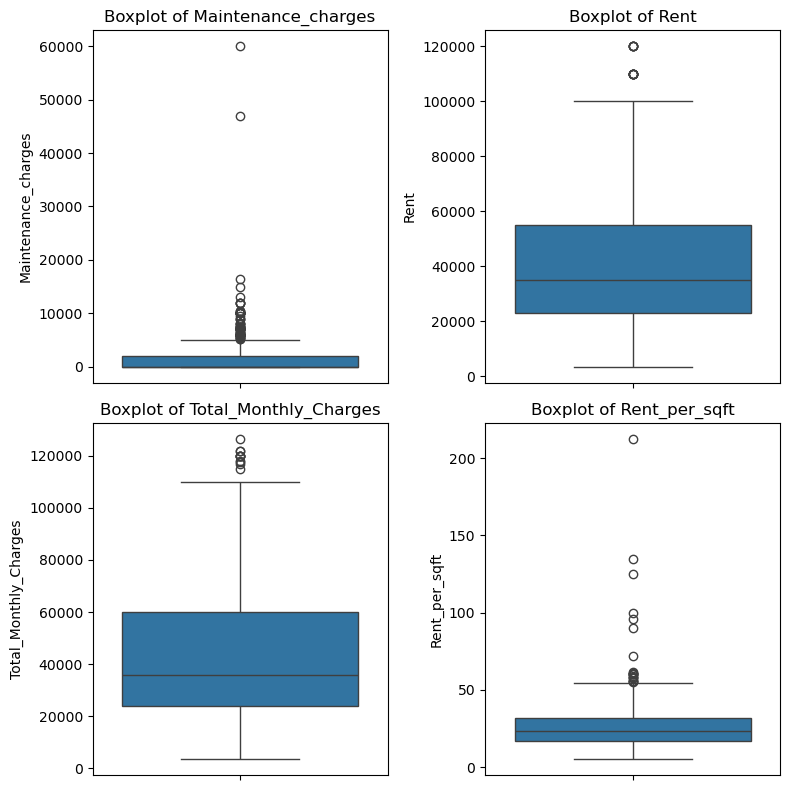

In [29]:
plt.figure(figsize=(8,8))
for i,col in enumerate(numerical_cols,1):
    plt.subplot(2,2,i)
    sns.boxplot(y=df[col])
    plt.title(f"Boxplot of {col}")
plt.tight_layout()

**Maintenance Charges:**
- A large number of properties do not have any maintenance charges (at least 50%).
- A few properties have very high charges, indicating outliers.
- Highly right-skewed distribution.

**Rent:**
- Rent prices vary widely, from affordable to luxury segments.
- 50% of rents are below ₹35,000, but the mean is pulled up by higher values.
- Again, right-skewed, with expensive properties inflating the average.

**Monthly Charges:**
- This column closely follows the rent distribution because most maintenance charges are 0.
- Slightly higher than rent mean due to added charges in upper percentiles.
- Majority pay below ₹36,000, with a few paying extremely high.

**Rent per sqft:**
- The distribution of Rent_per_sqft is right-skewed (positively skewed), with most values concentrated between approximately 10 and 40(lower end), and a long tail extending towards higher values contributing to skewness and outliers.
- The boxplot confirms the presence of several outliers, with many data points lying far above the upper whisker, some exceeding 200.
- This suggests that while most rental rates per square foot are moderate, there are some properties with exceptionally high rates, which may need further investigation or could represent premium locations.

### **Categorical Variables**:
### Non Visual Univariate Analysis for Categorical Variables:

In [30]:
cat_cols = ["Type","Furnishing_Status","Bedrooms","Tenant_Prefered","Availability"]
for i in cat_cols:
    print(df[i].value_counts())
    print("\n","*"*20,"\n")

Type
Apartment    449
House        104
Villa         85
Name: count, dtype: int64

 ******************** 

Furnishing_Status
Semi-Furnished    386
Unfurnished       131
Furnished         121
Name: count, dtype: int64

 ******************** 

Bedrooms
3    347
2    183
4     63
1     45
Name: count, dtype: int64

 ******************** 

Tenant_Prefered
Bachelors/Family    332
Bachelors           223
Family               83
Name: count, dtype: int64

 ******************** 

Availability
Immediately     583
From Jun '25     37
From Jul '25     11
From May '25      5
From Sep '25      1
From Aug '25      1
Name: count, dtype: int64

 ******************** 



### Visual Univariate Analysis for Categorical Variables:

C:\Users\home\AppData\Local\Temp\ipykernel_15764\966277575.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x= df[col], palette='Set2')
C:\Users\home\AppData\Local\Temp\ipykernel_15764\966277575.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x= df[col], palette='Set2')
C:\Users\home\AppData\Local\Temp\ipykernel_15764\966277575.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x= df[col], palette='Set2')
C:\Users\home\AppData\Local\Temp\ipykernel_15764\966277575.py:4: FutureWarning: 

Passing `palette` without a

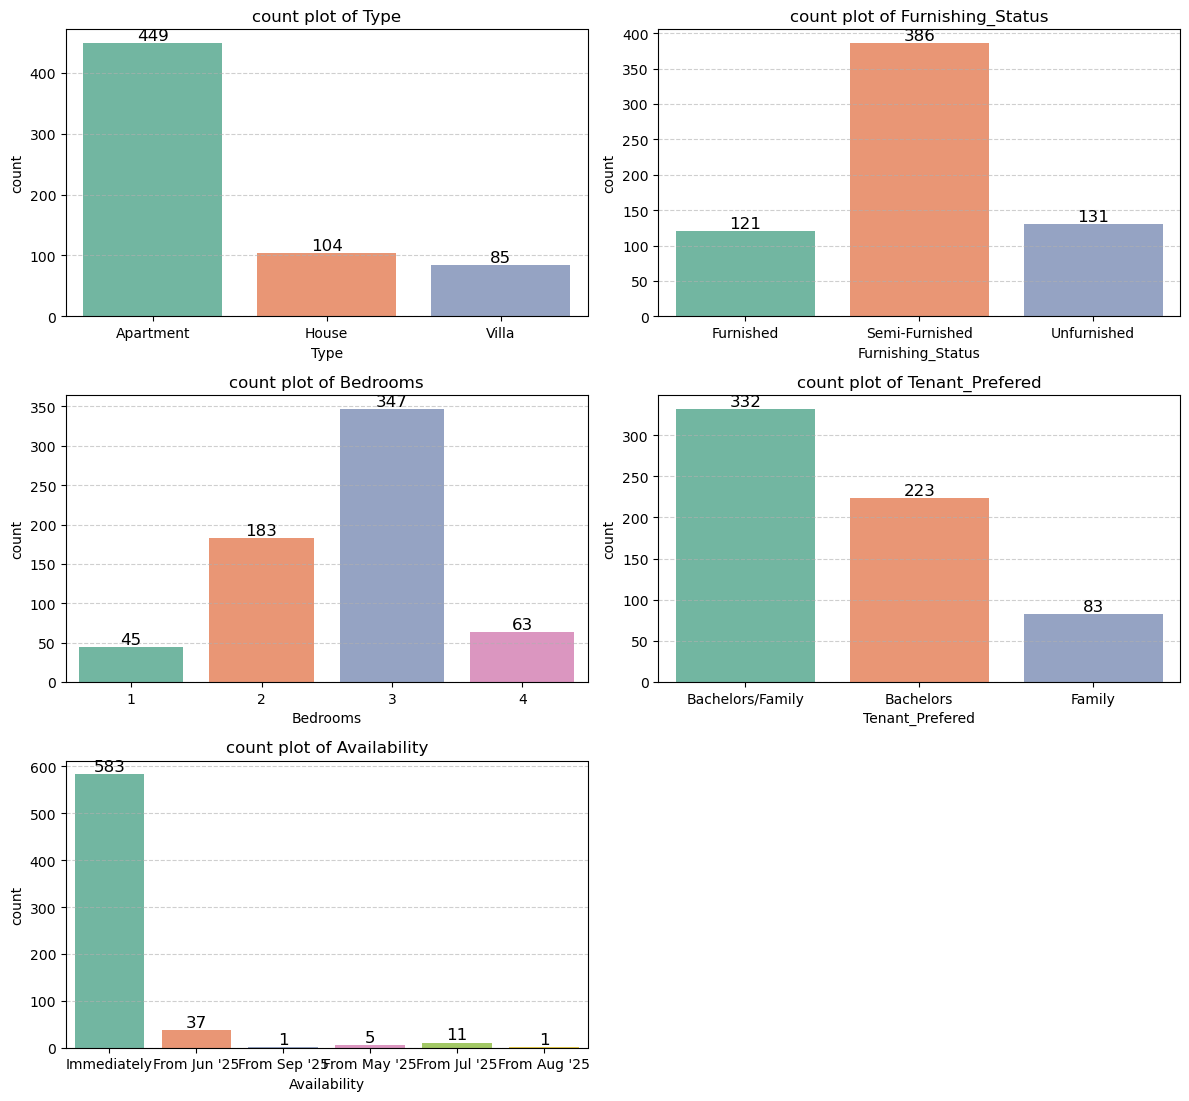

In [31]:
plt.figure(figsize=(12,18))
for i,col in enumerate(cat_cols,1):
    plt.subplot(5,2,i)
    ax = sns.countplot(x= df[col], palette='Set2')
    for p in ax.patches:
        count = int(p.get_height())
        ax.annotate(count, (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='bottom', fontsize=12, color='black')
    plt.title(f"count plot of {col}")
    plt.grid(axis="y",linestyle="--",alpha=0.6)
plt.tight_layout()

- The rental market is dominated by Apartments, possibly due to affordability.
- Semi-furnished properties are most available, as they strike a balance between cost and convenience, making them more popular.
- 3BHK properties are more common, may be targetting families or shared tenants.
- Most landlords are flexible to any type of tenants Bachelors/Family.
- Most of the properties are immediately available to move in.

## **Step 4 - BiVariate Analysis**:
### Continuous & Categorical:

Average Total Monthly Charges by Type
Type
Apartment    45016.240535
House        23652.884615
Villa        53562.341176
Name: Total_Monthly_Charges, dtype: float64
Average Total Monthly Charges by Bedrooms
Bedrooms
1    15277.777778
2    26906.786885
3    49268.426513
4    71704.841270
Name: Total_Monthly_Charges, dtype: float64


C:\Users\home\AppData\Local\Temp\ipykernel_15764\2211285733.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_charges_type, x=i, y="Total_Monthly_Charges", palette="viridis")
C:\Users\home\AppData\Local\Temp\ipykernel_15764\2211285733.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_charges_type, x=i, y="Total_Monthly_Charges", palette="viridis")


Average Total Monthly Charges by Furnishing_Status
Furnishing_Status
Furnished         51798.537190
Semi-Furnished    43681.264249
Unfurnished       31270.229008
Name: Total_Monthly_Charges, dtype: float64


C:\Users\home\AppData\Local\Temp\ipykernel_15764\2211285733.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_charges_type, x=i, y="Total_Monthly_Charges", palette="viridis")


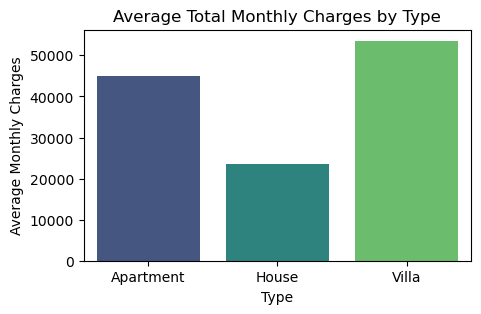

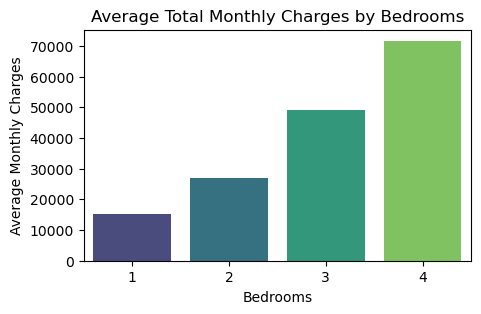

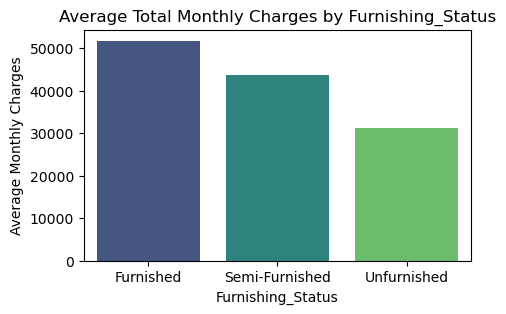

In [32]:
for i in ["Type","Bedrooms","Furnishing_Status"]:
    print(f"Average Total Monthly Charges by {i}")
    print(df.groupby(i)["Total_Monthly_Charges"].mean())
    avg_charges_type = df.groupby(i)["Total_Monthly_Charges"].mean().reset_index()
    plt.figure(figsize=(5, 3))
    sns.barplot(data=avg_charges_type, x=i, y="Total_Monthly_Charges", palette="viridis")

    plt.title(f"Average Total Monthly Charges by {i}")
    plt.ylabel("Average Monthly Charges")
    plt.xlabel(i)

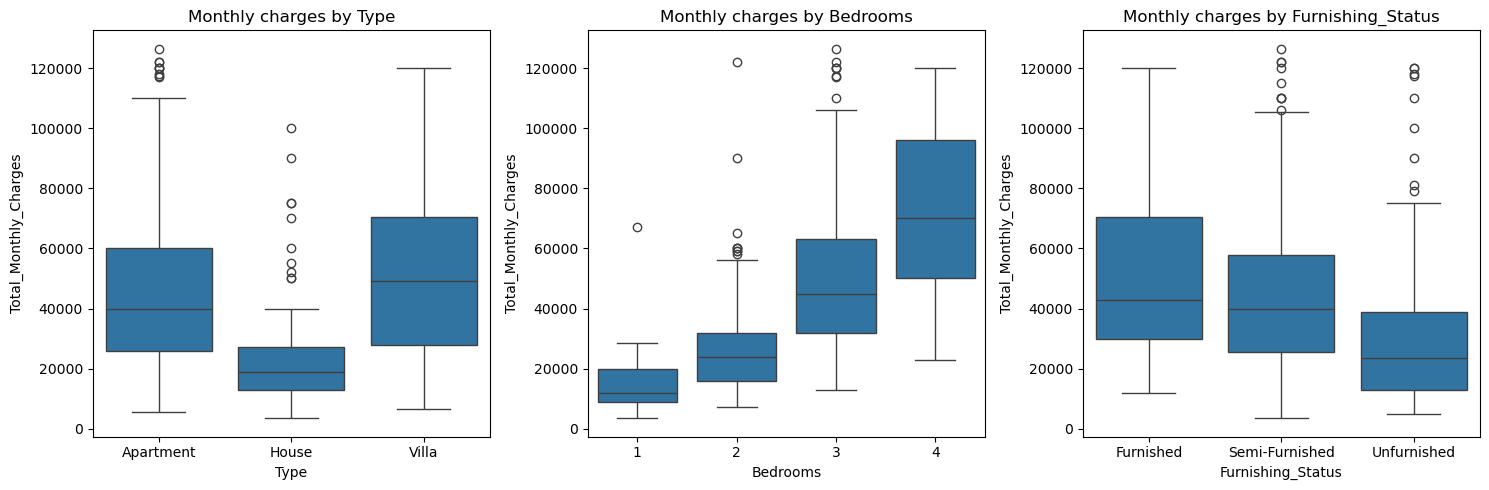

In [33]:
# Monthly charges
plt.figure(figsize=(15,5))
for i,col in enumerate(["Type","Bedrooms","Furnishing_Status"],1):
    plt.subplot(1,3,i)
    sns.boxplot(x=col, y="Total_Monthly_Charges", data=df)
    plt.title(f'Monthly charges by {col}')
plt.tight_layout()
plt.show()

- Villas, properties with more bedrooms, and furnished units command higher monthly charges.
- Houses, 1-bedroom units, and unfurnished properties are generally more affordable.
- Greater amenities and space (more bedrooms, furnished status) are associated with higher and more variable monthly charges.

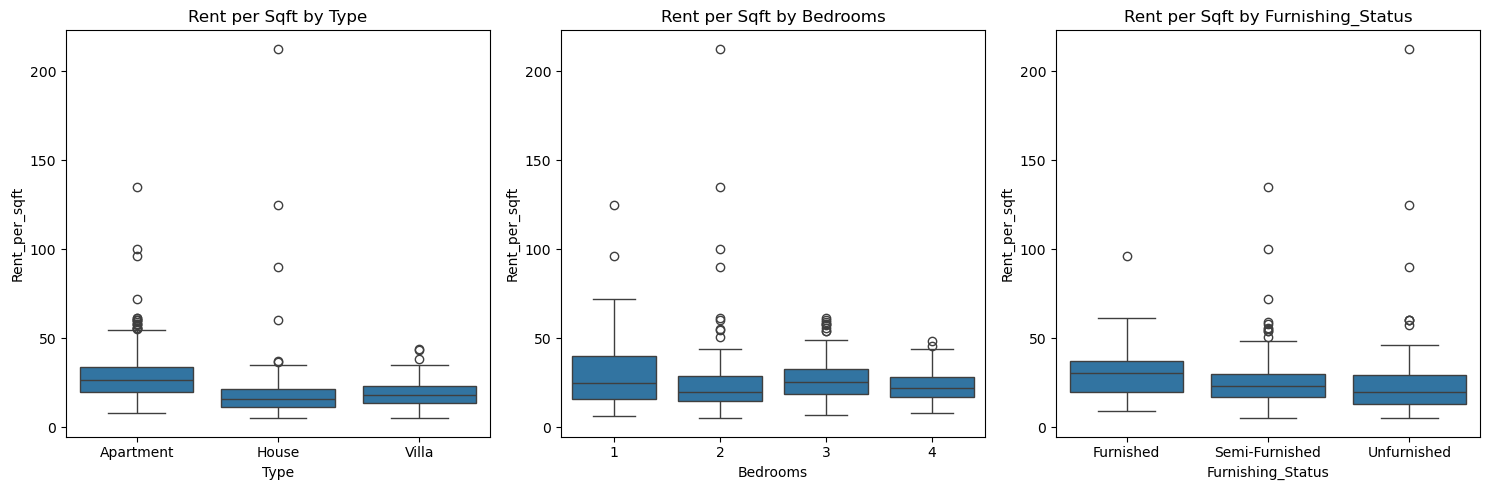

In [34]:
# Rent per sqft 
plt.figure(figsize=(15,5))
for i,col in enumerate(["Type","Bedrooms","Furnishing_Status"],1):
    plt.subplot(1,3,i)
    sns.boxplot(x=col, y="Rent_per_sqft", data=df)
    plt.title(f'Rent per Sqft by {col}')
plt.tight_layout()
plt.show()

- Apartments and furnished properties tend to command higher rents per square foot.
- Smaller properties (1-bedroom) are priced higher per square foot than larger ones.
- There is significant variability and presence of outliers across all categories, especially for apartments and 1-bedroom properties.

#### Continuous vs Continuous :

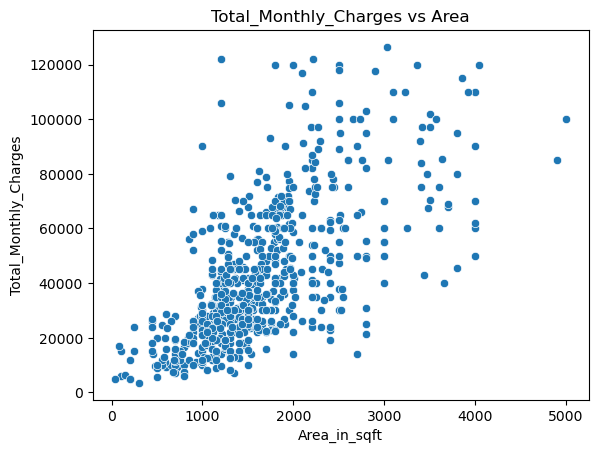

                       Area_in_sqft  Total_Monthly_Charges
Area_in_sqft               1.000000               0.661909
Total_Monthly_Charges      0.661909               1.000000
              Bedrooms  Area_in_sqft
Bedrooms      1.000000      0.749962
Area_in_sqft  0.749962      1.000000


In [35]:
sns.scatterplot(x="Area_in_sqft", y="Total_Monthly_Charges", data=df)
plt.title("Total_Monthly_Charges vs Area")
plt.show()

print(df[["Area_in_sqft", "Total_Monthly_Charges"]].corr())
print(df[["Bedrooms","Area_in_sqft"]].corr())

- There is a positive correlation between property area and total monthly charges – as the area increases, the monthly charges tend to increase.
- The data points are more densely clustered between 500 to 2000 sqft, suggesting most properties fall within this range.
- Beyond 2000 sqft, monthly charges become more variable, indicating higher unpredictability in costs for larger properties.

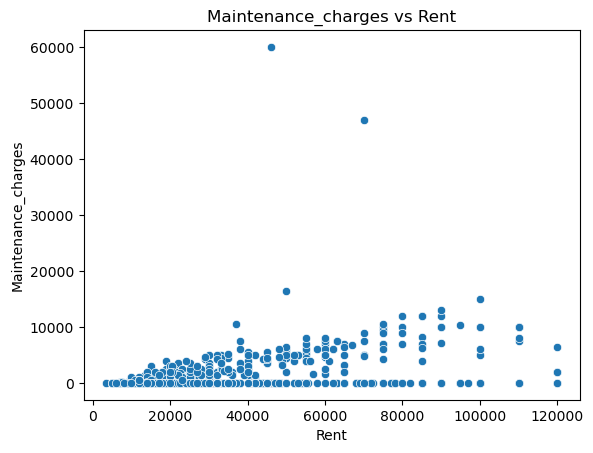

                     Maintenance_charges      Rent
Maintenance_charges             1.000000  0.315228
Rent                            0.315228  1.000000


In [36]:
sns.scatterplot(x="Rent", y="Maintenance_charges", data=df)
plt.title("Maintenance_charges vs Rent")
plt.show()

print(df[["Maintenance_charges", "Rent"]].corr())

- There is a weak positive correlation between rent and maintenance charges, as rent increases, maintenance charges tend to rise slightly, but not strongly.
- Most properties have maintenance charges below ₹10,000, regardless of how high the rent is.
- A few extreme outliers exist (e.g., maintenance charges above ₹50,000), which may be due to luxury amenities or data anomalies.
- High rent doesn't always imply high maintenance – this suggests rent and maintenance are often independently set.

#### Categorical vs Categorical:


Crosstab: Type vs Furnishing_Status
Furnishing_Status  Furnished  Semi-Furnished  Unfurnished
Type                                                     
Apartment                 95             281           73
House                      9              51           44
Villa                     17              54           14


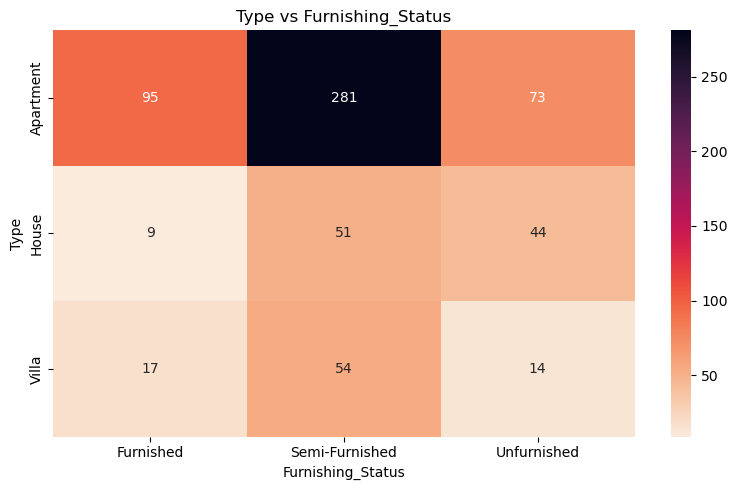


Crosstab: Type vs Tenant_Prefered
Tenant_Prefered  Bachelors  Bachelors/Family  Family
Type                                                
Apartment              164               232      53
House                   29                59      16
Villa                   30                41      14


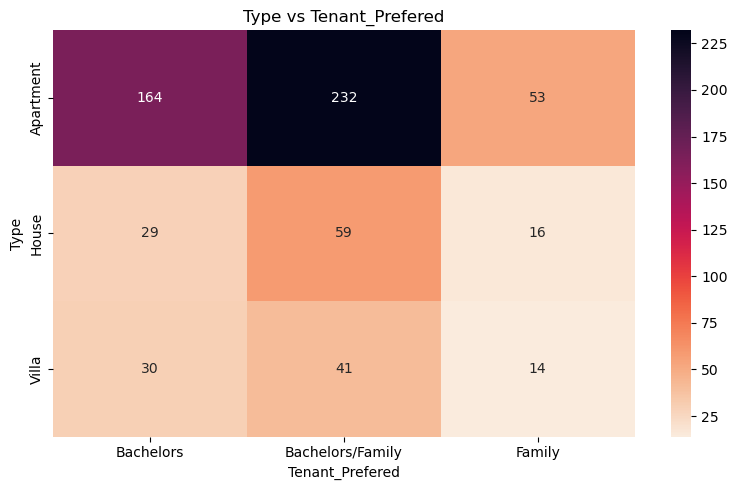


Crosstab: Type vs Bedrooms
Bedrooms    1    2    3   4
Type                       
Apartment  27  117  287  18
House      15   59   23   7
Villa       3    7   37  38


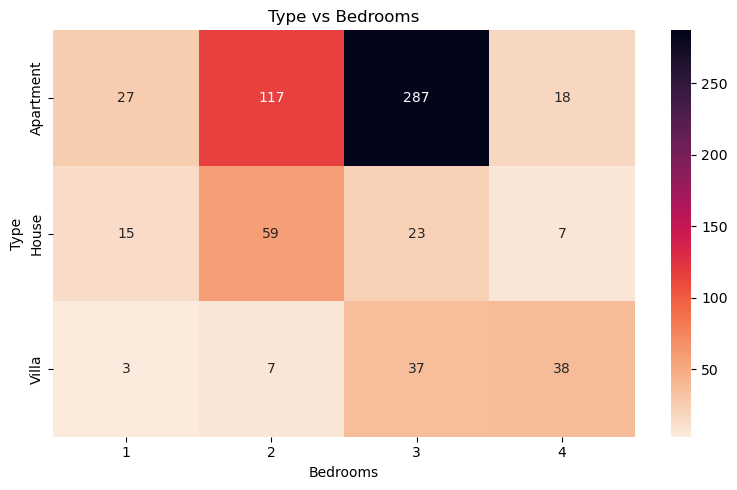

In [37]:
# List of categorical pairs for crosstab analysis
cat_pairs = [
    ("Type", "Furnishing_Status"),
    ("Type", "Tenant_Prefered"),
    ("Type", "Bedrooms")
]

# Loop through each pair and display crosstab and heatmap
for col1, col2 in cat_pairs:
    print(f"\nCrosstab: {col1} vs {col2}")
    ct = pd.crosstab(df[col1], df[col2])
    print(ct)
    
    plt.figure(figsize=(8, 5))
    sns.heatmap(ct, annot=True, fmt="d", cmap="rocket_r")
    plt.title(f"{col1} vs {col2}")
    plt.ylabel(col1)
    plt.xlabel(col2)
    plt.tight_layout()
    plt.show()

- Apartments dominate the listings and offer the most variety in furnishing status, tenant preference, and bedroom count.
- Semi-furnished is the most common furnishing status, especially for apartments and villas.
- Villas are generally larger (3 or 4 bedrooms), while houses and apartments are more likely to have 2 or 3 bedrooms.
- Most properties are targeted at both bachelors and families rather than exclusively families.

### Multivariate Analysis:

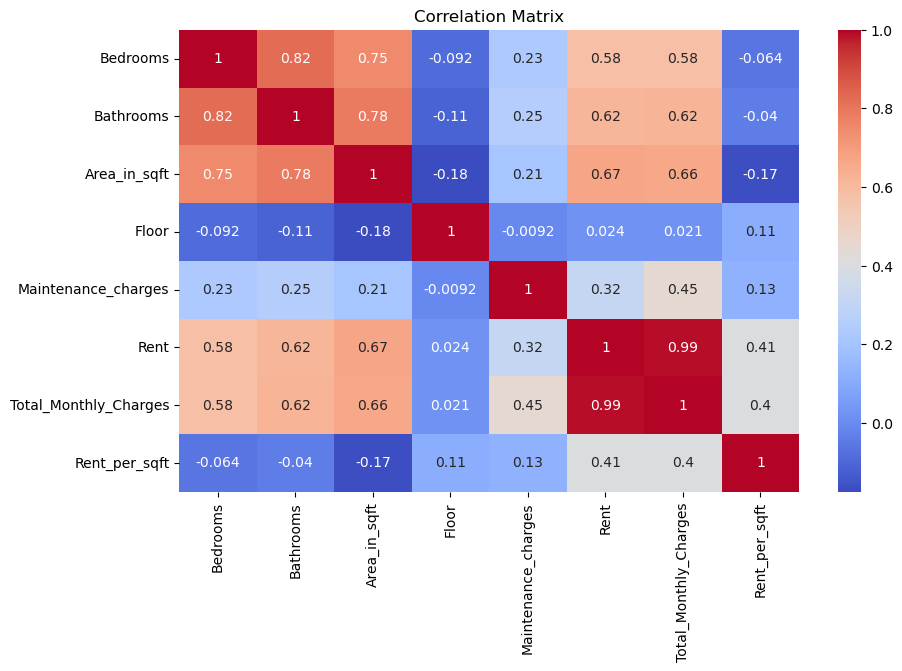

In [38]:
# Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.select_dtypes(include="number").corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


**Strong Positive Correlation:**
-  Bedrooms, Bathrooms, and Area_in_sqft show strong positive correlations with each other. This indicates that properties with more bedrooms tend to have more bathrooms and larger areas.
-  Rent and Total_Monthly_Charges are almost perfectly correlated (0.99), as expected, since total charges typically include rent as a major component.
- Area_in_sqft has a strong positive correlation with both Rent (0.67) and Total_Monthly_Charges (0.66), meaning larger properties generally have higher rents and total charges.

**Moderate Positive Correlation:**
- Maintenance_charges have a moderate positive correlation with Rent (0.32) and Total_Monthly_Charges (0.45), suggesting that properties with higher rent also tend to have higher maintenance charges.

**Weak or Negative Correlation:**
- Floor shows very weak or slightly negative correlations with most variables, indicating that the floor level of a property does not significantly impact rent, area, or number of rooms.
- Rent_per_sqft has weak negative correlations with Bedrooms (-0.064), Bathrooms (-0.04), and Area_in_sqft (-0.17), suggesting that larger properties (with more rooms or area) tend to have a slightly lower rent per square foot.

In [39]:
pd.pivot_table(df,index = ["Type","Bedrooms"],columns=["Furnishing_Status"],values="Total_Monthly_Charges",aggfunc="mean")

Furnishing_Status      Furnished  Semi-Furnished   Unfurnished
Type      Bedrooms                                            
Apartment 1         22136.363636    24583.333333  13450.000000
          2         36007.692308    30954.294118  23586.956522
          3         63274.500000    49172.958974  44442.105263
          4         93500.000000    70991.666667  91475.000000
House     1                  NaN     9225.000000   8690.909091
          2         24120.000000    18807.692308  21189.285714
          3         26500.000000    29852.941176  23500.000000
          4         87500.000000    58750.000000  60000.000000
Villa     1         15000.000000     8000.000000   6500.000000
          2                  NaN    23925.000000  13916.666667
          3         51944.444444    43534.521739  55700.000000
          4         66571.428571    69021.346154  75600.000000

This pivot table summarizes the mean Total Monthly Charges by property Type, Bedrooms, and Furnishing_Status.
- Across all property types (Apartment, House, Villa), the average monthly charges generally increase as the number of bedrooms increases.
- For almost every combination of property type and bedroom count, Furnished properties have higher average monthly charges than Semi-Furnished or Unfurnished ones.
- Unfurnished is the Most Affordable.
- Villas with 4 bedrooms have lower mean charges than Apartments with 4 bedrooms in the Furnished segment, but higher than Houses.

## Conclusions:
- The rent levels in Hyderabad are influenced by Property type, Size, Furnishing Status and Location, with premium areas and larger, furnished properties commanding the highest rents. 
- Premium locations such as Hitech City, Gachibowli, Banjara Hills, and Jubilee Hills have the highest rents and rent per sqft.
- For lower rents we need to move to the outskirts of the city like Hayathnagar, Boduppal, Peerzadiguda, etc.
- Villas are expensive compared to Apartments and Houses.
- Greater amenities and space (more bedrooms, furnished status) are associated with higher and more variable monthly charges.
- Apartments are more common, likely due to affordability and availability.
- Semi-Furnished properties are most common and offer moderate rents.
- Most listings prefer families or both bachelors and families, with immediate availability.